# Wyscout Data for Inter 2017-18

In this notebooks we will learn to work with [Wyscout](https://wyscout.com/) data and to extract useful information for the tactical point of view.

For this course we will use che [Player Rank](https://github.com/mesosbrodleto/playerank) open source project owned by Pappalardo Luca, Cintia Paolo & Co.

## utilities

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import util
path = "C:/Users/Mauro/OneDrive/Documenti/Football/Inter_2017_2018"
inter_id = 3161

**COUNT TOTAL PASSES FOR EACH PLAYER IN EACH MATCH**

In [2]:
inter_matches_events = pd.read_csv(os.path.join(path, "inter_matches_events.csv"))
#filter by pass event (eventId == 8) and team associated to the event (teamId == 3161, which is inter_id)
#get column referred to match (matchId) and player (playerId)
total_passes = inter_matches_events.query("eventId == 8 and teamId == 3161")[['matchId', 'playerId']]
total_passes.head(3)

,matchId,playerId
5,2575963,20517
15,2575963,116349
16,2575963,20556


In [3]:
#group the passes by playerId and matchId to obtain the count of passes for each player in each match
total_passes = pd.DataFrame(total_passes.groupby(['playerId', 'matchId']).size()).reset_index()
total_passes.columns = ["playerId", "matchId", "#passes"]
total_passes.head(3)

,playerId,matchId,#passes
0,3344,2576174,1
1,3344,2576180,27
2,3344,2576191,26


In [4]:
#merge the count of passes with players data to obtain the players' name and the players' role
inter_players = pd.read_csv(os.path.join(path, "inter_players.csv"))
total_passes = pd.merge(total_passes, inter_players, how="left", left_on="playerId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "#passes"]]
total_passes.head(3)

,playerId,role_name,shortName,matchId,#passes
0,3344,Midfielder,Rafinha,2576174,1
1,3344,Midfielder,Rafinha,2576180,27
2,3344,Midfielder,Rafinha,2576191,26


In [5]:
#merge the count of passes with matches data to obtain the matches' gameweek and the matches' label
inter_matches = pd.read_csv(os.path.join(path, "inter_matches.csv"))
total_passes = pd.merge(total_passes, inter_matches, how="left", left_on="matchId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "gameweek", "label", "#passes"]]
total_passes.head(3)

,playerId,role_name,shortName,matchId,gameweek,label,#passes
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",27
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",26


**FOCUS ON BROZOVIC PASS PERFORMANCE**

In [6]:
brozovic = inter_players[inter_players.shortName.str.contains("Brozo")]
brozovic

,wyId,role_name,shortName
21,69968,Midfielder,M. Brozović


In [7]:
match_id = inter_matches[inter_matches.label.str.contains(" - Napoli")].wyId.iloc[0]
total_passes.query("playerId == " + str(brozovic.wyId.iloc[0]) + " and matchId == " + str(match_id))

,playerId,role_name,shortName,matchId,gameweek,label,#passes
311,69968,Midfielder,M. Brozović,2576234,28,"Internazionale - Napoli, 0 - 0",57


**BROZOVIC NUMBER OF PASS EVOLUTION DURING THE SEASON (COMPARED WITH BORJA VALERO)**

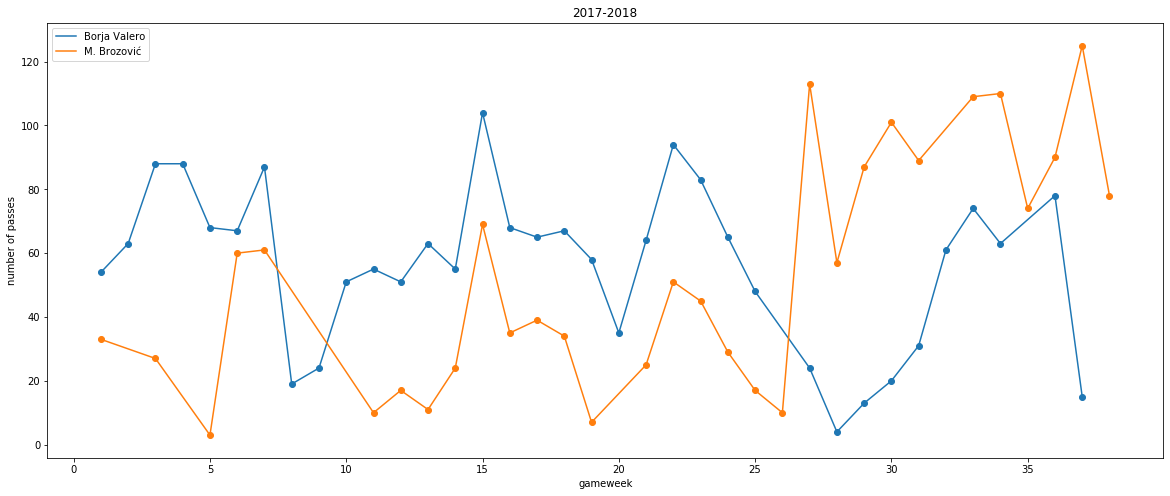

In [21]:
plt.figure(figsize=(20, 8))
players_to_compare = ["M. Brozović", "Borja Valero"]
group = total_passes.query("shortName in " + str(players_to_compare))
for p in group.shortName.unique():
    df = group[group.shortName == p].sort_values(by="gameweek", ascending=True)
    df = df.reset_index(drop=True)
    plt.plot(df.gameweek, df["#passes"])
    plt.scatter(df.gameweek, df["#passes"])
plt.title("2017-2018")
plt.xlabel("gameweek")
plt.ylabel("number of passes")
plt.legend(group.shortName.unique())
plt.show()

**CALCULATE PASS ACCURACY FOR EACH PLAYER IN EACH MATCH**

In [10]:
##filter by pass event (eventId == 8) and team associated to the event (teamId == 3161, which is inter_id)
positive_passes = inter_matches_events.query("eventId == 8 and teamId == 3161")
#assign a label positive="yes" for each accurate pass (which has 1801 in tags)
#get columns referred to match (matchId), player (playerId) and label of the pass' outcome
positive_passes = util.label_positive_passes(positive_passes, "tags")[['matchId', 'playerId', 'positive']]
positive_passes.head(3)

,matchId,playerId,positive
0,2575963,20517,yes
1,2575963,116349,yes
2,2575963,20556,yes


In [11]:
#filter to keep only accurated pass
positive_passes = positive_passes.query("positive == 'yes'")
#group accurated pass by match and player to obtain the count of accurated pass for each player in each match
positive_passes = pd.DataFrame(positive_passes.groupby(['playerId', 'matchId', 'positive']).size()).reset_index()
positive_passes.drop("positive", axis=1, inplace=True)
positive_passes.columns = ["playerId", "matchId", "#positive_passes"]
positive_passes.head(3)

,playerId,matchId,#positive_passes
0,3344,2576174,1
1,3344,2576180,26
2,3344,2576191,23


In [12]:
#merge with players' data to obtain players' name and players' role
positive_passes = pd.merge(positive_passes, inter_players, how="left", left_on="playerId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "#positive_passes"]]
positive_passes.head(3)

,playerId,role_name,shortName,matchId,#positive_passes
0,3344,Midfielder,Rafinha,2576174,1
1,3344,Midfielder,Rafinha,2576180,26
2,3344,Midfielder,Rafinha,2576191,23


In [14]:
#merge with matches' data to obtain matches' gameweek and matches' label
positive_passes = pd.merge(positive_passes, inter_matches, how="left", left_on="matchId", right_on="wyId")[["playerId", "role_name", "shortName", "matchId", "gameweek", "label", "#positive_passes"]]
positive_passes.head(3)

,playerId,role_name,shortName,matchId,gameweek,label,#positive_passes
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",26
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",23


In [16]:
#merge with count of total passes data 
positive_passes = pd.merge(total_passes, positive_passes, how="left", left_on=["matchId", "playerId"], right_on=["matchId", "playerId"])[["playerId", "role_name_x", "shortName_x", "matchId", "gameweek_x", "label_x", "#positive_passes", "#passes"]]
positive_passes.head(3)

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#positive_passes,#passes
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1.0,1
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",26.0,27
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",23.0,26


In [17]:
#calculate pass accuracy dividing count of accurated passes by count of total passes
positive_passes['pass_accuracy'] = round((positive_passes["#positive_passes"] / positive_passes["#passes"]) * 100, 2)
positive_passes.head(3)

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#positive_passes,#passes,pass_accuracy
0,3344,Midfielder,Rafinha,2576174,22,"SPAL - Internazionale, 1 - 1",1.0,1,100.00
1,3344,Midfielder,Rafinha,2576180,23,"Internazionale - Crotone, 1 - 1",26.0,27,96.30
2,3344,Midfielder,Rafinha,2576191,24,"Internazionale - Bologna, 2 - 1",23.0,26,88.46


**FOCUS ON BROZOVIC PASS PERFORMANCE**

In [18]:
match_id = inter_matches[inter_matches.label.str.contains(" - Napoli")].wyId.iloc[0]
positive_passes.query("playerId == " + str(brozovic.wyId.iloc[0]) + " and matchId == " + str(match_id))

,playerId,role_name_x,shortName_x,matchId,gameweek_x,label_x,#positive_passes,#passes,pass_accuracy
311,69968,Midfielder,M. Brozović,2576234,28,"Internazionale - Napoli, 0 - 0",50.0,57,87.72


**BROZOVIC PASS ACCURACY EVOLUTION DURING THE SEASON (COMPARED WITH BORJA VALERO)**

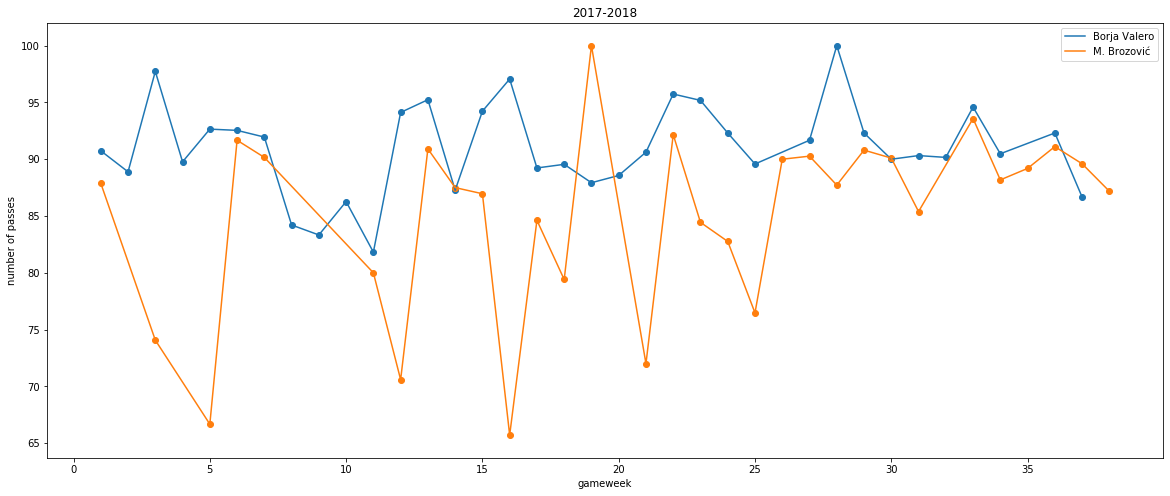

In [19]:
plt.figure(figsize=(20, 8))
players_to_compare = ["M. Brozović", "Borja Valero",]
group = positive_passes.query("shortName_x in " + str(players_to_compare))
for p in group.shortName_x.unique():
    df = group[group.shortName_x == p].sort_values(by="gameweek_x", ascending=True)
    df = df.reset_index(drop=True)
    plt.plot(df.gameweek_x, df["pass_accuracy"])
    plt.scatter(df.gameweek_x, df["pass_accuracy"])
plt.title("2017-2018")
plt.xlabel("gameweek")
plt.ylabel("number of passes")
plt.legend(group.shortName_x.unique())
plt.show()